In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#GENERATE and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [3]:
#imbalanced dataset
X,Y = make_classification(n_samples=10000,n_features = 2,n_clusters_per_class=1,n_redundant=0,weights =[0.99],random_state=10)

In [4]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [5]:
Counter(Y)

Counter({0: 9846, 1: 154})

<Axes: xlabel='0', ylabel='1'>

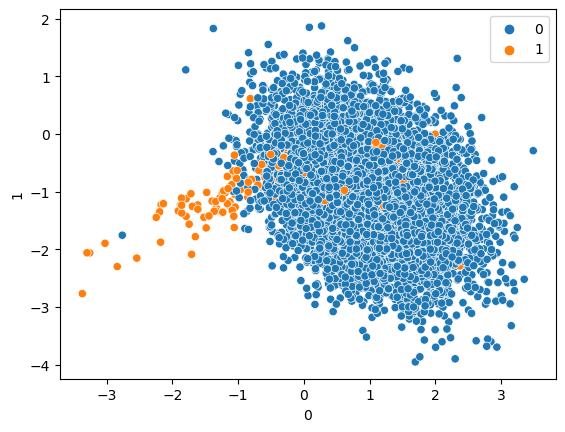

In [6]:
# sns.scatterplot(pd.DataFrame(X)[0],pd.DataFrame(X)[1],hue=Y)
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=Y)

In [7]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


In [8]:
from sklearn.linear_model import LogisticRegression

In [32]:
model =LogisticRegression()#(penalty='elasticnet', l1_ratio=0.5, solver='saga', max_iter=2000)
 # You can increase the value if needed

penalty =['l1','l2','elasticnet']#The penalty specifies the type of regularization
#that is applied to the model to prevent overfitting LAsso.Ridge,Elasticnet

c_values = [100,10,1.0,0.1,0.01]#The C parameter controls the regularization strength, 
#where C is the inverse of the regularization strength. Smaller values of C mean stronger regularization

solver = ['newton-cg','lbfgs','liblinear','sag','saga']#Solvers are optimization algorithms 
#used to minimize the loss function and find the best coefficients for the logistic regression model
class_weight =[{0:w,1:Y} for w in [1,10,50,100]for Y in [1,10,50,100]]

In [34]:
params = dict(penalty=penalty ,C=c_values,solver=solver,class_weight=class_weight)

In [36]:
class_weight #value degine kr di ki 10 ki value h 011 / 1 ki valie h 111 etc

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid= GridSearchCV(estimator = model,param_grid=params,scoring = 'accuracy',cv=cv)

In [42]:
grid.fit(X_train,Y_train)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [48]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [54]:
Y_pred = grid.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score = accuracy_score(Y_test,Y_pred)
cm = confusion_matrix(Y_test,Y_pred)
report = classification_report(Y_test,Y_pred)
print (score)
print(cm)
print(report)

0.9896
[[2465    0]
 [  26    9]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2465
           1       1.00      0.26      0.41        35

    accuracy                           0.99      2500
   macro avg       0.99      0.63      0.70      2500
weighted avg       0.99      0.99      0.99      2500

